In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("D:\Semester 3\FE Sayantan\Class 4\Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [27]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df.drop(['CustomerID'],axis=1,inplace=True) 
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [28]:
df.shape 

(200, 4)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


for col in df.columns:
    X = df.drop([col], axis=1)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
    reg = DecisionTreeRegressor()
    reg.fit(X_train,y_train)
    print('Score for {} as dependent variable is {}'.format(col,reg.score(X_test,y_test)))

Score for Gender as dependent variable is -0.6666666666666665
Score for Age as dependent variable is -0.5392574230748504
Score for Annual Income (k$) as dependent variable is -0.6115615862621593
Score for Spending Score (1-100) as dependent variable is -0.4357763366021261


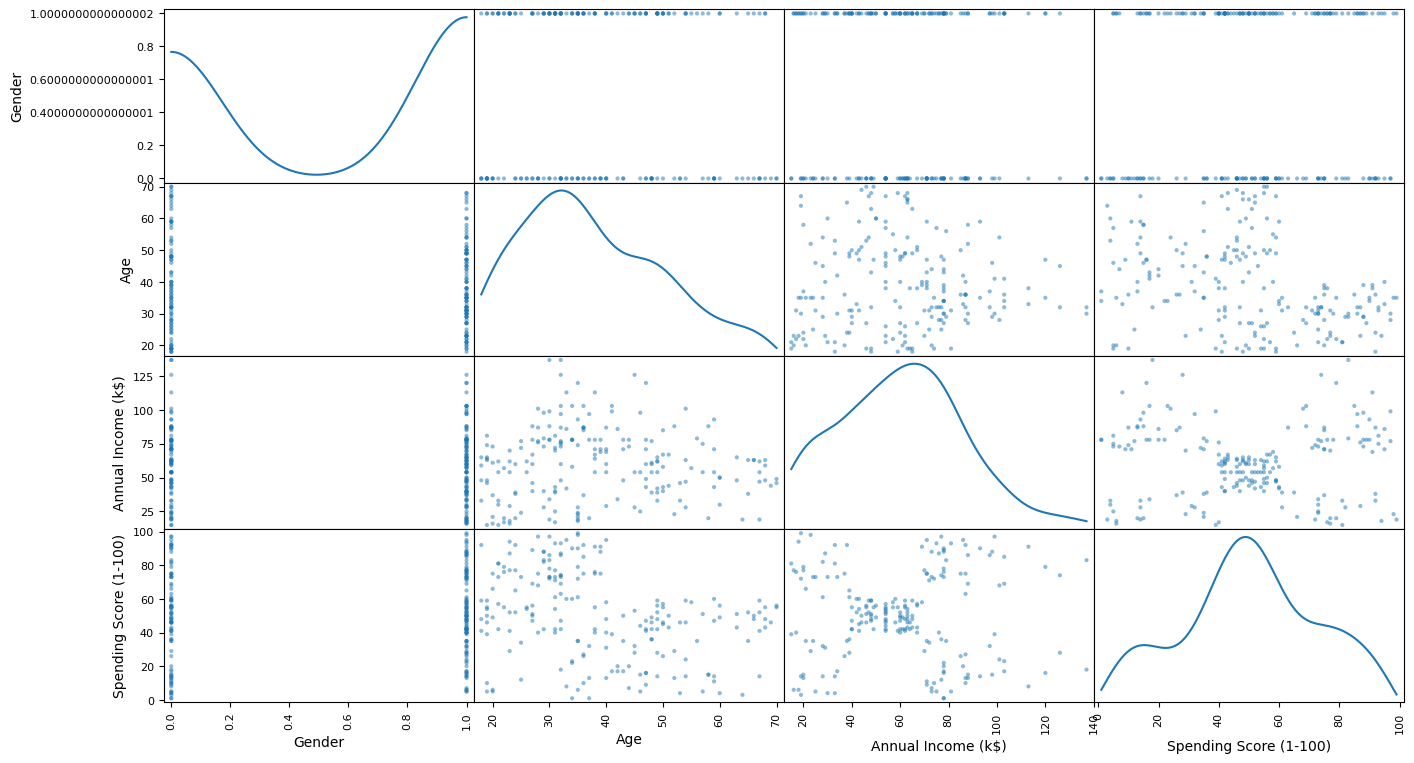

In [30]:
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(16, 9), diagonal='kde')
plt.show()

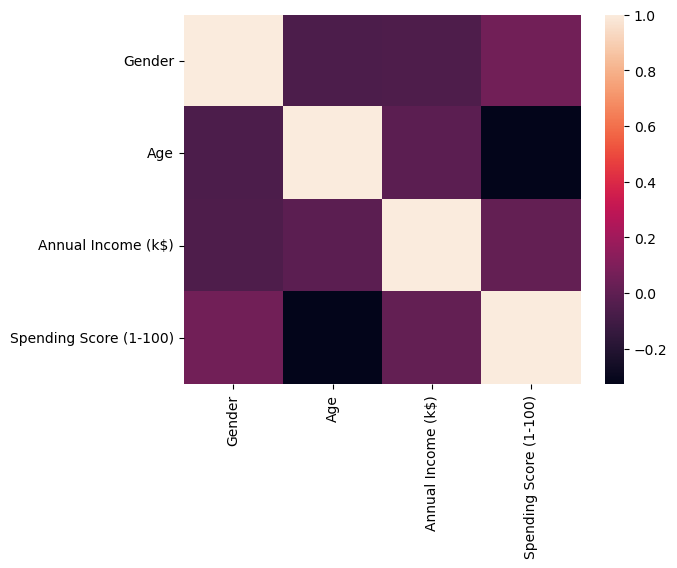

In [31]:
import seaborn as sns
sns.heatmap(df.corr(),xticklabels=df.columns,yticklabels=df.columns)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(df)
pca.explained_variance_ratio_

array([4.51180770e-01, 4.40915393e-01, 1.07745663e-01, 1.58174873e-04])

In [33]:
pca.components_

array([[ 3.32728191e-04, -1.88977291e-01,  5.88622756e-01,
         7.86009366e-01],
       [-1.57871198e-03,  1.30961404e-01,  8.08388308e-01,
        -5.73894557e-01],
       [-1.46246563e-03,  9.73208009e-01,  5.51456957e-03,
         2.29855656e-01],
       [-9.99997629e-01, -1.69291569e-03, -1.08842837e-03,
         8.31387662e-04]])

In [34]:
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

components = pd.DataFrame(pca.components_,columns=df.columns)
components.index = dimensions

variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'])
variance.index = dimensions

pd.concat([variance,components], axis=1)

,Explained Variance,Gender,Age,Annual Income (k$),Spending Score (1-100)
Dimension 1,0.451181,0.000333,-0.188977,0.588623,0.786009
Dimension 2,0.440915,-0.001579,0.130961,0.808388,-0.573895
Dimension 3,0.107746,-0.001462,0.973208,0.005515,0.229856
Dimension 4,0.000158,-0.999998,-0.001693,-0.001088,0.000831


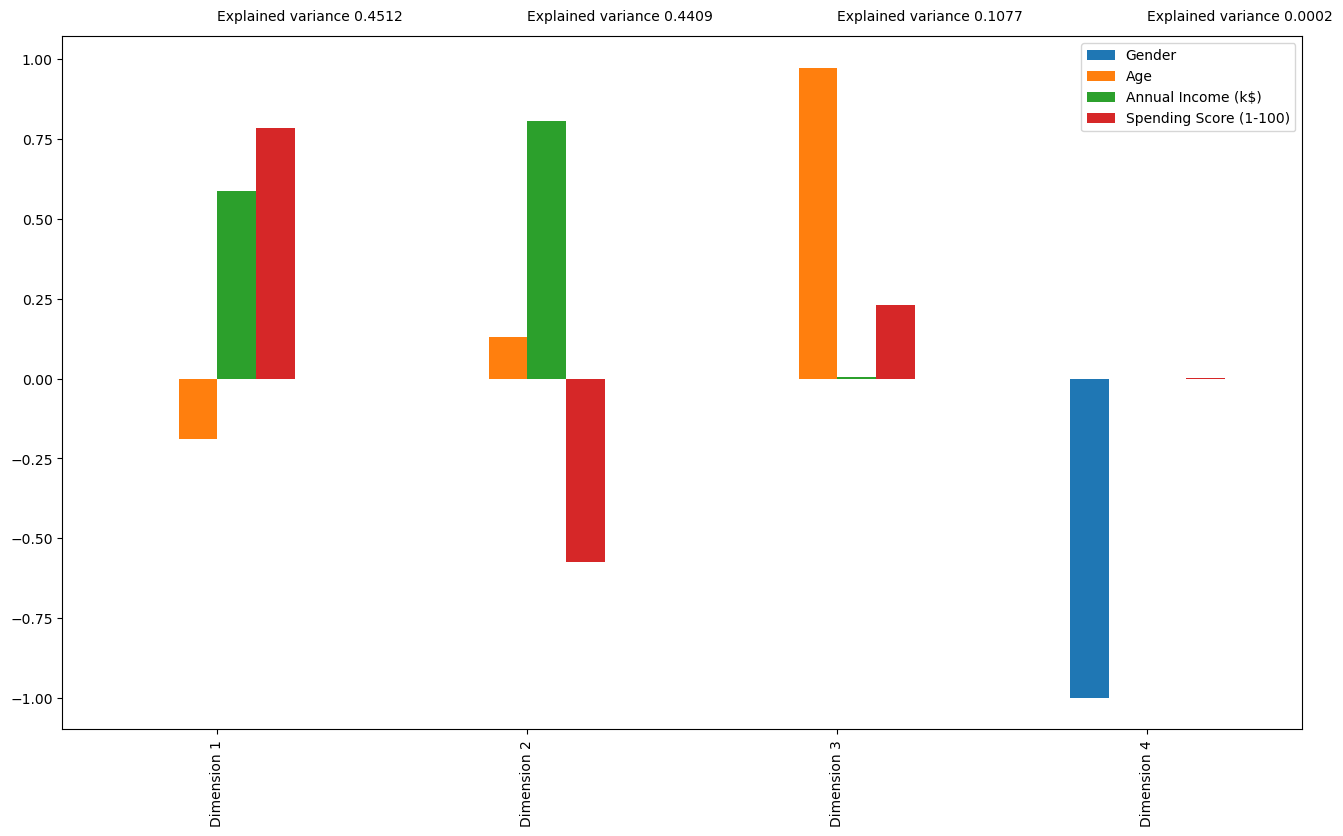

In [35]:
fig, ax = plt.subplots(figsize=(16,9))
components.plot(kind='bar', ax=ax)
ax.set_xticklabels(dimensions)
for i,variance in enumerate(pca.explained_variance_ratio_):
    ax.text(i,ax.get_ylim()[1]+0.05,'Explained variance {}'.format(np.round(variance,4)))
plt.show()

As the variance explained by the first two principal components is ~ 0.9(0.45+0.44) we can say its good to use only the first two principal components

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
pca.explained_variance_ratio_

array([0.45118077, 0.44091539])

In [37]:
transformed_data = pca.transform(df)
transformed_data = pd.DataFrame(transformed_data,columns=['Dimension 1','Dimension 2'])
transformed_data.head()

,Dimension 1,Dimension 2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known t

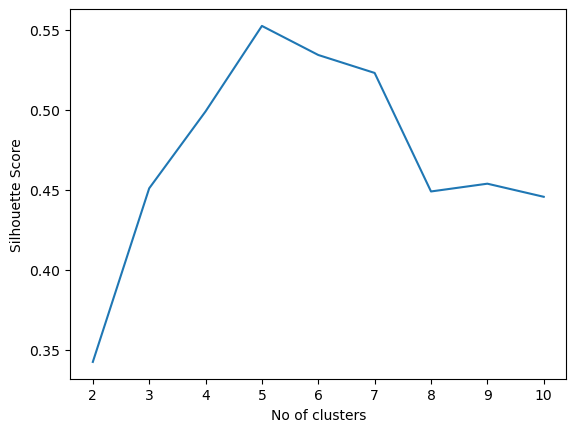

In [38]:
# Use silhouette score to find the ideal number of clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

no_of_clusters= range(2,11)
kmeans = [KMeans(n_clusters=i) for i in no_of_clusters]
score = [silhouette_score(transformed_data,kmeans[i].fit(transformed_data).predict(transformed_data),metric='euclidean') for i in range(len(kmeans))]
plt.plot(no_of_clusters,score)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.show()


The score starts decreasing after 5. So, we are going to use 5 clusters.

C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


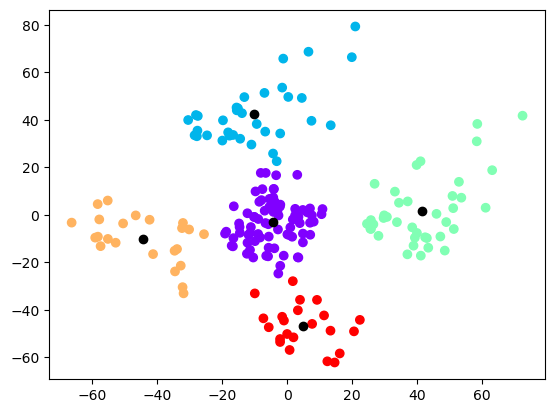

In [39]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(transformed_data)
kmeans.predict(transformed_data)

plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


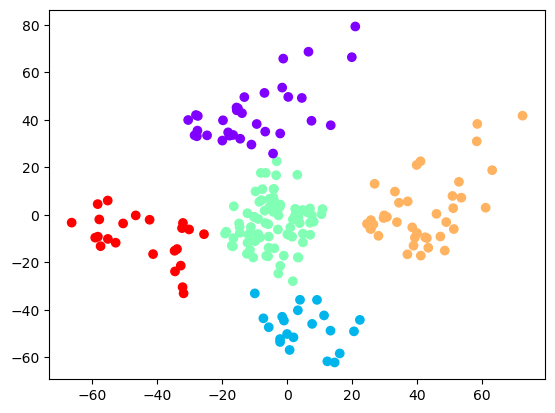

In [40]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(transformed_data)
labels = gmm.predict(transformed_data)

plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=labels,cmap='rainbow')
plt.show()

This is a soft clustering method. So, each data point is associated with a probability value for each of the clusters. We can say the cluster with the highest probability owns the data point ! :)

In [41]:
cluster_proba_df = pd.DataFrame(gmm.predict_proba(transformed_data), columns = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
cluster_proba_df['Belongs to'] = cluster_proba_df.idxmax(axis=1)
cluster_proba_df.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Belongs to
0,1.826497e-09,2.236624e-03,1.929718e-03,1.089046e-07,0.995834,Cluster 5
1,2.815304e-26,9.997846e-01,1.840718e-06,2.022082e-04,0.000011,Cluster 2
2,8.182513e-05,3.351835e-12,2.868063e-11,6.879619e-18,0.999918,Cluster 5
3,6.562763e-24,9.997199e-01,1.557133e-05,2.136782e-04,0.000051,Cluster 2
4,6.210016e-09,8.851367e-04,1.775014e-03,4.174927e-08,0.997340,Cluster 5
